In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

In [78]:
data = pd.read_csv("./Data/gym_members_exercise_tracking.csv")

In [79]:
# Ver las primeras filas del dataset
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [80]:
# Información general sobre el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [81]:
# Descripción estadística
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [82]:
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [83]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [84]:
data['Workout_Type'].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [85]:
data = pd.get_dummies(data, columns=['Gender', 'Workout_Type'], drop_first=True)

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 
                   'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']

data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

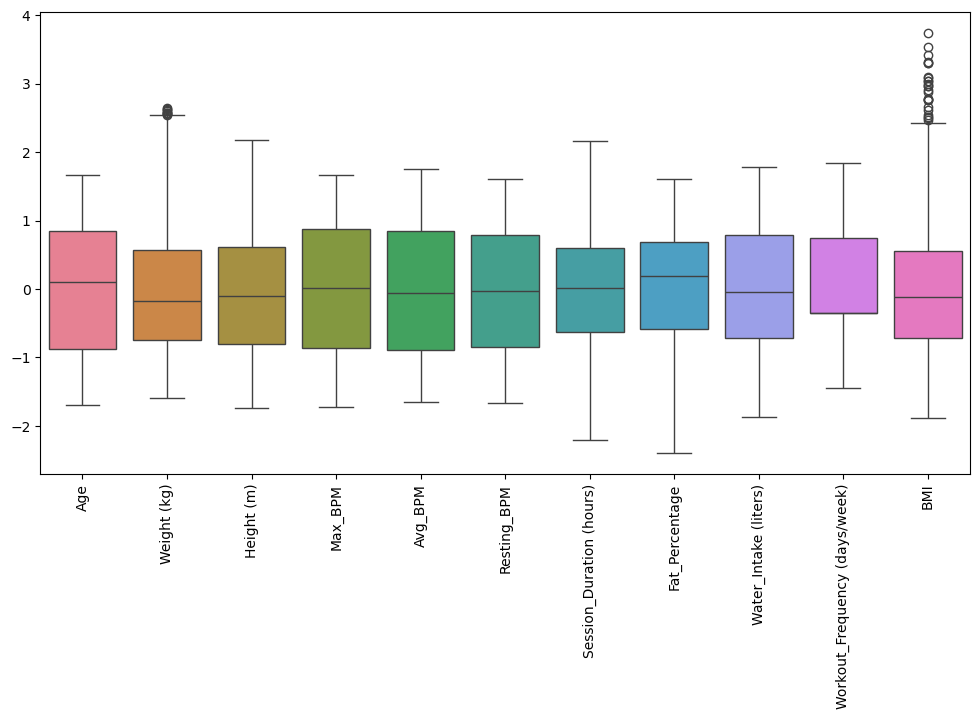

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_columns])
plt.xticks(rotation=90)
plt.show()

In [88]:
print(f"Dimensiones originales: {data.shape}")

# Calcular el rango intercuartílico (IQR) para BMI
Q1 = data['BMI'].quantile(0.25)  # Primer cuartil (25%)
Q3 = data['BMI'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1                    # Rango intercuartílico

# Establecer los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Límite inferior: {lower_limit}, Límite superior: {upper_limit}")

# Identificar y contar los valores extremos
outliers = data[(data['BMI'] < lower_limit) | (data['BMI'] > upper_limit)]
print(f"Valores extremos detectados: {len(outliers)}")

# Eliminar los valores extremos directamente en el DataFrame original
data = data[(data['BMI'] >= lower_limit) & (data['BMI'] <= upper_limit)]

# Verificar que los valores extremos han sido eliminados
print(f"Dimensiones después de eliminar valores extremos: {data.shape}")


Dimensiones originales: (973, 17)
Límite inferior: -2.625196222346909, Límite superior: 2.4518184424116245
Valores extremos detectados: 25
Dimensiones después de eliminar valores extremos: (948, 17)


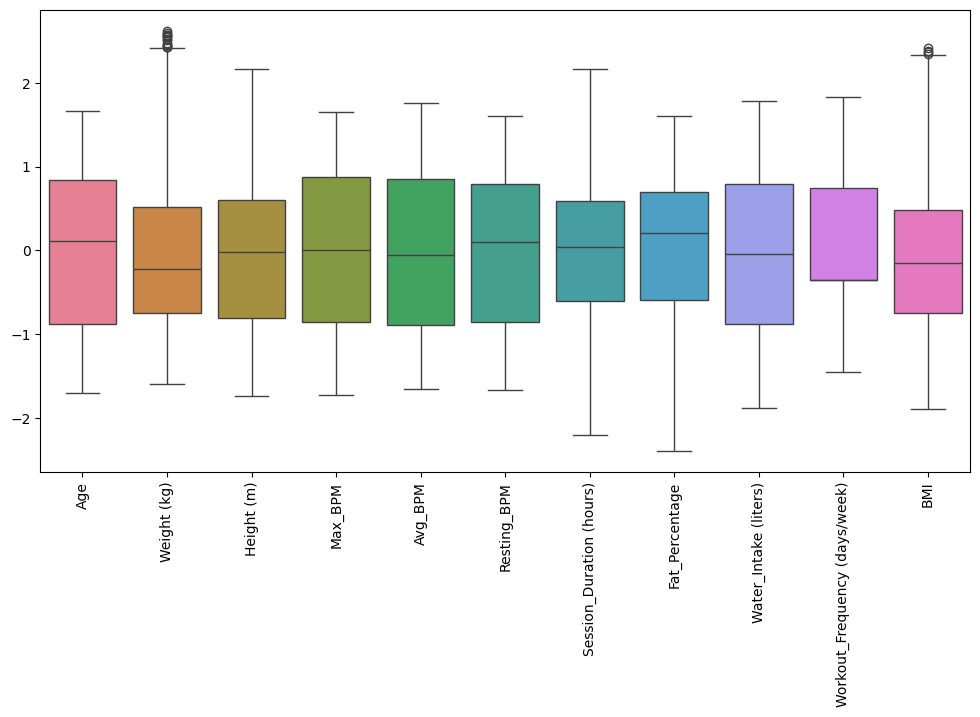

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_columns])
plt.xticks(rotation=90)
plt.show()

In [90]:
X = data.drop(columns=['Calories_Burned'])
y = data['Calories_Burned']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.5, random_state=42)

In [92]:
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (758, 16)
Dimensiones del conjunto de prueba: (190, 16)


In [93]:
X_train.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
113,-1.698893,0.648468,1.624861,-1.639258,-0.332459,1.335052,1.352098,-2.090210,1.455967,0.743295,3,-0.209108,True,True,False,False
81,0.272414,-0.677216,0.136465,1.312192,-0.192966,-1.395960,1.527098,-1.370923,0.122330,1.839092,3,-0.790411,False,False,False,True
562,-1.123928,2.205322,0.841495,-0.076726,-1.657634,-1.532510,-0.631235,-0.427859,-0.211079,-0.352502,2,1.666984,True,False,False,False
816,0.354552,-0.247902,-1.586940,-0.597570,-0.471951,0.788850,0.477098,0.499221,-0.044375,0.743295,2,0.717672,False,False,False,True
86,-1.123928,1.469355,1.233178,-0.510763,0.853224,0.652299,0.243765,-0.571716,-0.544488,-0.352502,2,0.720677,True,False,False,False


In [94]:
y_train.head()

113    1315.0
81     1129.0
562     686.0
816     875.0
86     1150.0
Name: Calories_Burned, dtype: float64

In [95]:
# Crear directorios si no existen
os.makedirs("Data/processedAca", exist_ok=True)
os.makedirs("Data/processedInv", exist_ok=True)
X.to_csv("Data/X_data.csv", index=False)
y.to_csv("Data/y_data.csv", index=False)
# Exportar conjuntos de entrenamiento y prueba
X_train.to_csv("Data/processedAca/X_train.csv", index=False)
X_test.to_csv("Data/processedAca/X_test.csv", index=False)
y_train.to_csv("Data/processedAca/y_train.csv", index=False)
y_test.to_csv("Data/processedAca/y_test.csv", index=False)

X_train_1.to_csv("Data/processedInv/X_train.csv", index=False)
X_test_1.to_csv("Data/processedInv/X_test.csv", index=False)
y_train_1.to_csv("Data/processedInv/y_train.csv", index=False)
y_test_1.to_csv("Data/processedInv/y_test.csv", index=False)

print("Conjuntos procesados exportados exitosamente.")

Conjuntos procesados exportados exitosamente.
